In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('./house_data/train.csv', index_col=0)

In [3]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


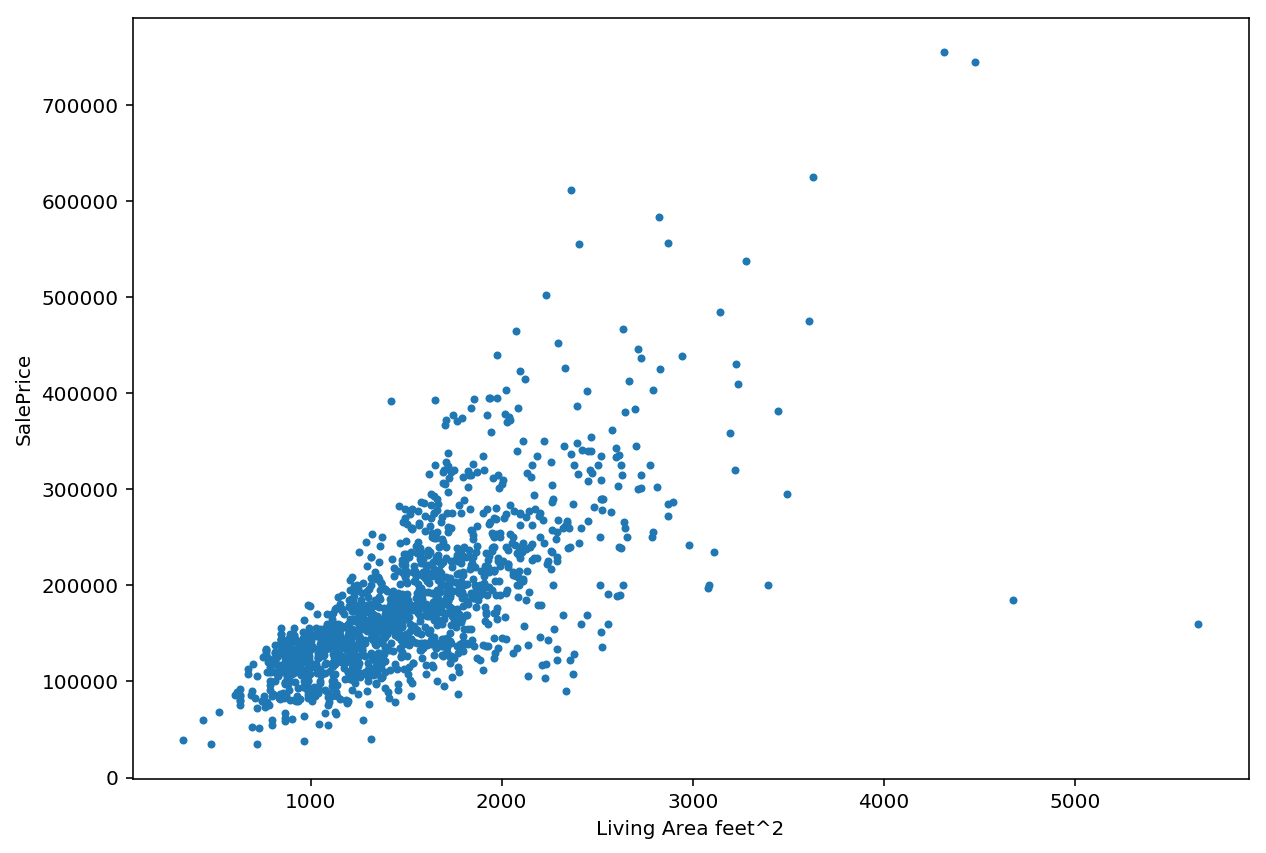

In [47]:
plt.figure(figsize=(10, 7))
plt.plot(data['GrLivArea'], data['SalePrice'], '.')
plt.xlabel('Living Area feet^2')
plt.ylabel('SalePrice');

In [8]:
np.corrcoef(data['GrLivArea'], data['SalePrice'])

array([[ 1.        ,  0.70862448],
       [ 0.70862448,  1.        ]])

In [13]:
X = np.array([[1, i] for i in data['GrLivArea'].values])

In [14]:
X

array([[   1, 1710],
       [   1, 1262],
       [   1, 1786],
       ..., 
       [   1, 2340],
       [   1, 1078],
       [   1, 1256]])

In [17]:
y = data['SalePrice'].values

In [20]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [ ]:
y = w*X

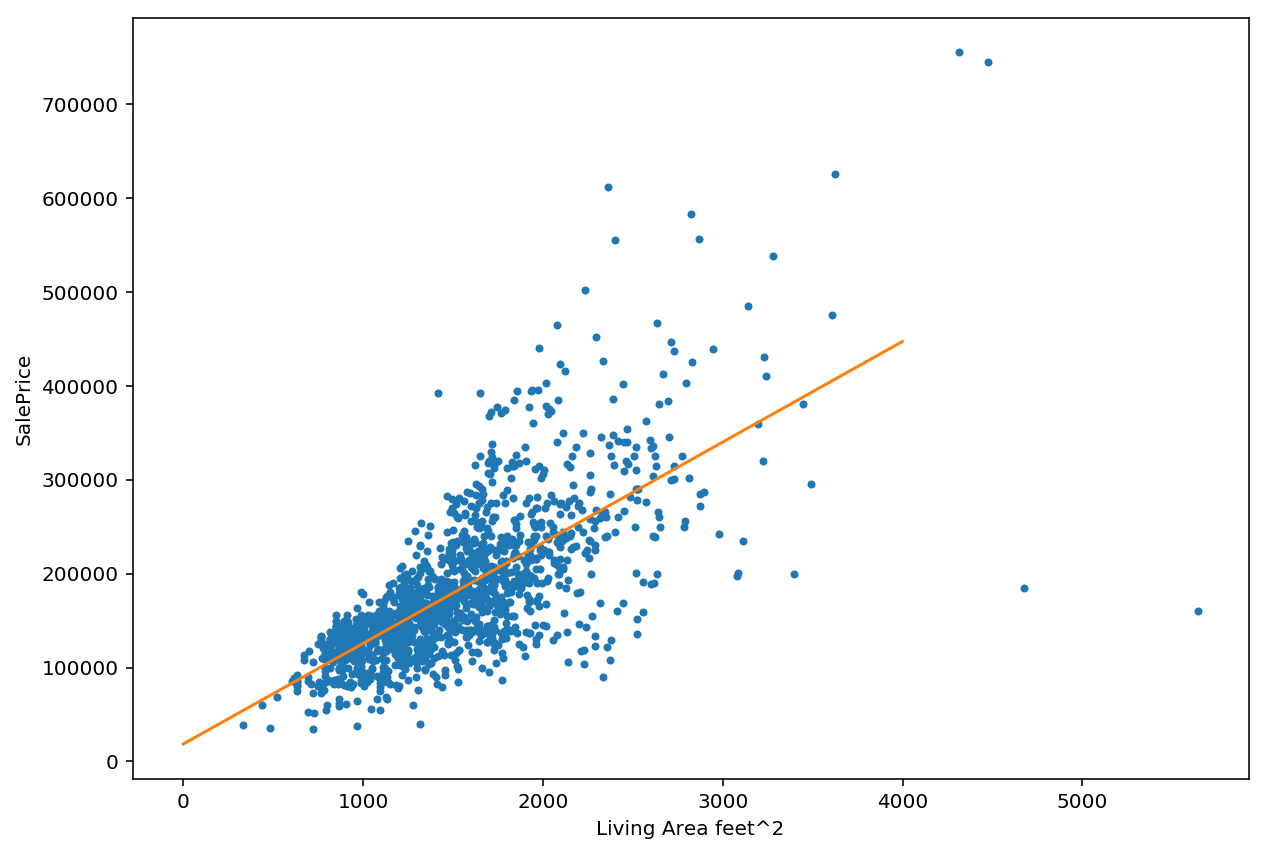

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(data['GrLivArea'], data['SalePrice'], '.')
plt.plot(np.arange(0, 4000), w[0] + w[1] * np.arange(0, 4000))
plt.xlabel('Living Area feet^2')
plt.ylabel('SalePrice');

In [27]:
(1/len(y)) * np.sum((y - w.dot(X.T))**2)

3139843209.6665268

In [33]:
new_X = X[X[:, 1] <= 4500]
new_y = y[X[:, 1] <= 4500]

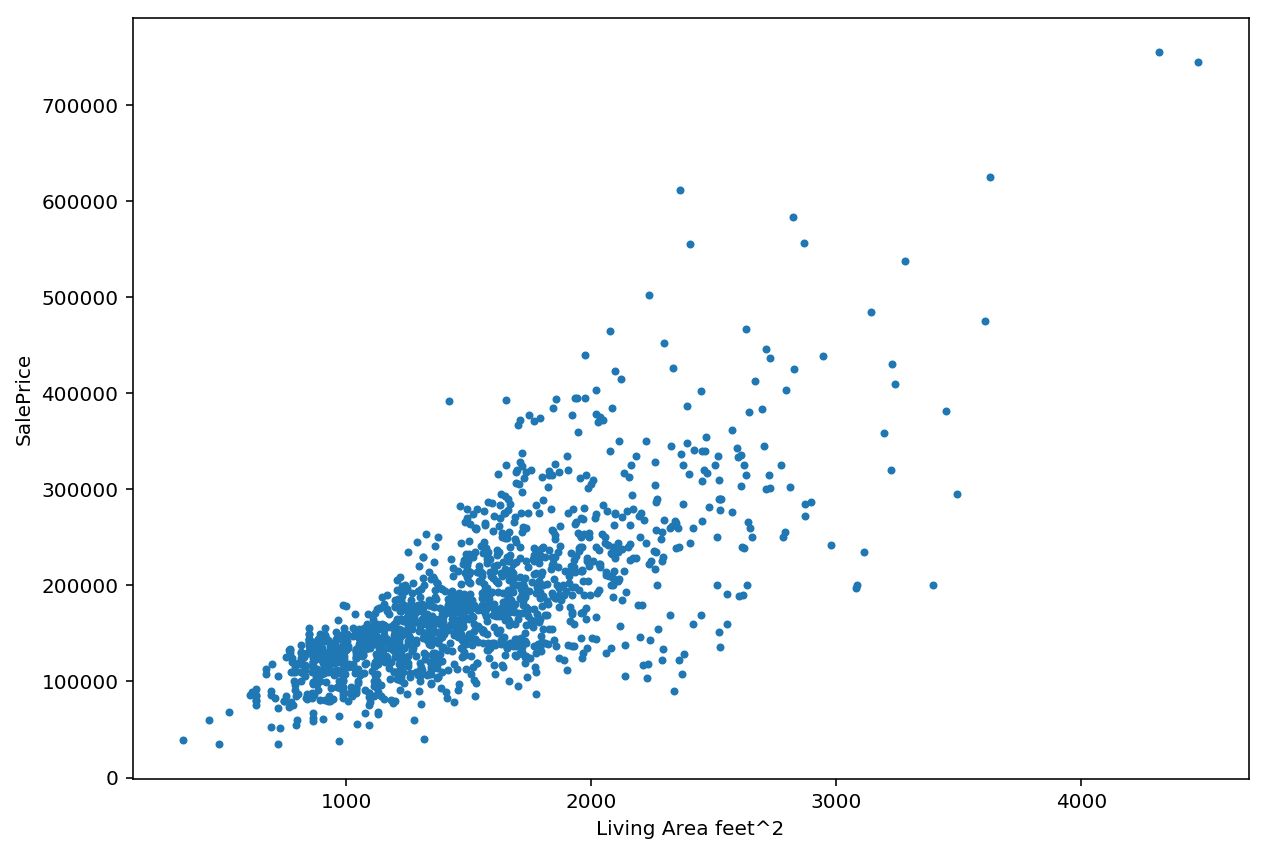

In [34]:
plt.figure(figsize=(10, 7))
plt.plot(new_X[:, 1], new_y, '.')
# plt.plot(np.arange(0, 4000), w[0] + w[1] * np.arange(0, 4000))
plt.xlabel('Living Area feet^2')
plt.ylabel('SalePrice');

In [35]:
new_w = np.linalg.inv(new_X.T.dot(new_X)).dot(new_X.T).dot(new_y)

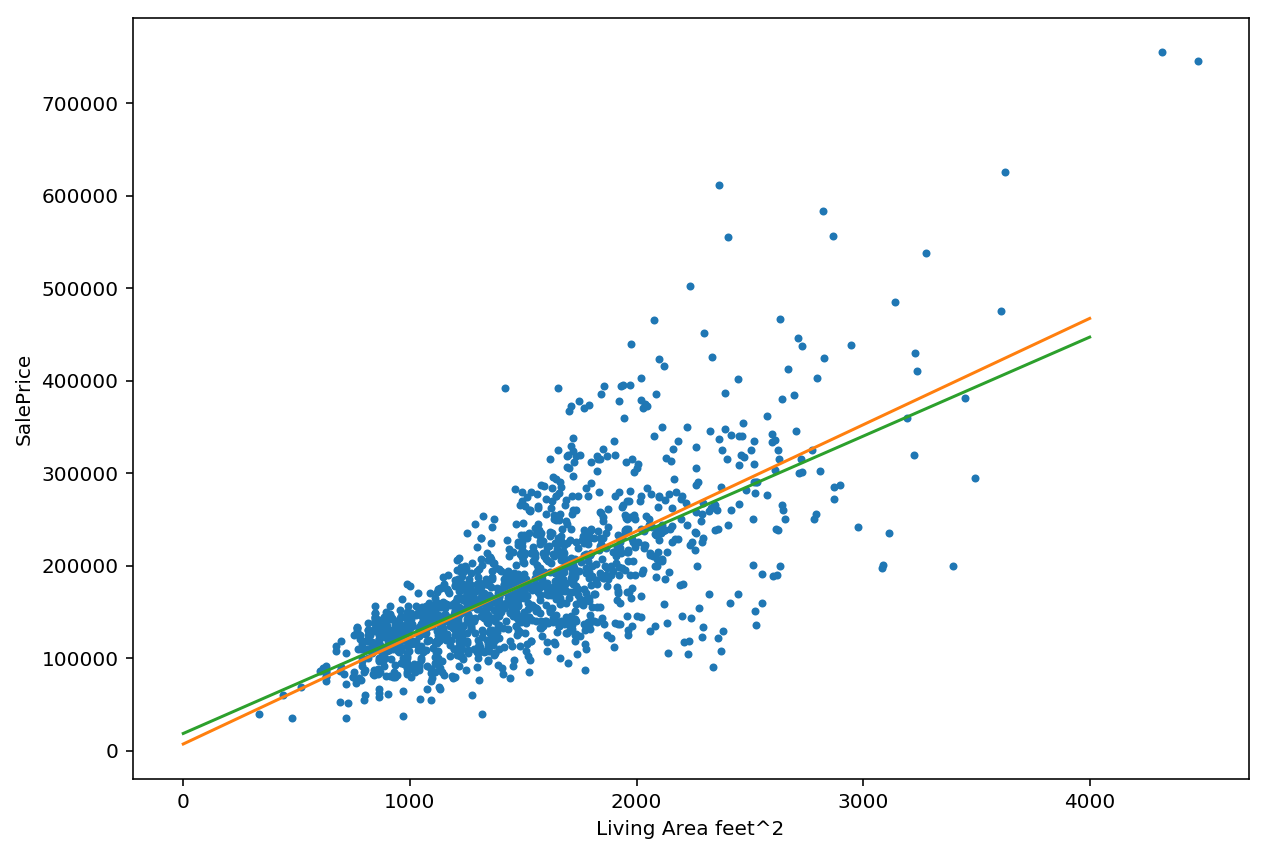

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(new_X[:, 1], new_y, '.')
plt.plot(np.arange(0, 4000), new_w[0] + new_w[1] * np.arange(0, 4000))
plt.plot(np.arange(0, 4000), w[0] + w[1] * np.arange(0, 4000))
plt.xlabel('Living Area feet^2')
plt.ylabel('SalePrice');

In [38]:
(1/len(new_y)) * np.sum((new_y - new_w.dot(new_X.T))**2)

2903834185.3368869

In [39]:
(1/len(y)) * np.sum((y - w.dot(X.T))**2)

3139843209.6665268

In [92]:
class MyLinearRegression(object):
    def __init__(self, num_variables):
        self.num_variables = num_variables
        self.w = np.zeros(num_variables + 1)
        
    def fit(self, X, y):
        assert len(X) == len(y)
        
        X = np.hstack((np.ones((len(X), 1)), X))
        
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, X):
        X = np.hstack((np.ones((len(X), 1)), X))
        return self.w.dot(X.T)

In [93]:
model = MyLinearRegression(2)

In [94]:
model.fit(data[['LotArea', 'GrLivArea']].values, data['SalePrice'].values)

In [86]:
model.w[1:].dot(np.vstack((np.arange(0, 4000),np.arange(0, 4000))))

array([  0.00000000e+00,   1.04484640e+02,   2.08969279e+02, ...,
         4.17625104e+05,   4.17729589e+05,   4.17834073e+05])

In [95]:
model.predict(np.vstack((np.arange(0, 4000),np.arange(0, 4000))).T)

array([  16621.43123635,   16725.91587585,   16830.40051536, ...,
        434246.5353454 ,  434351.01998491,  434455.50462441])

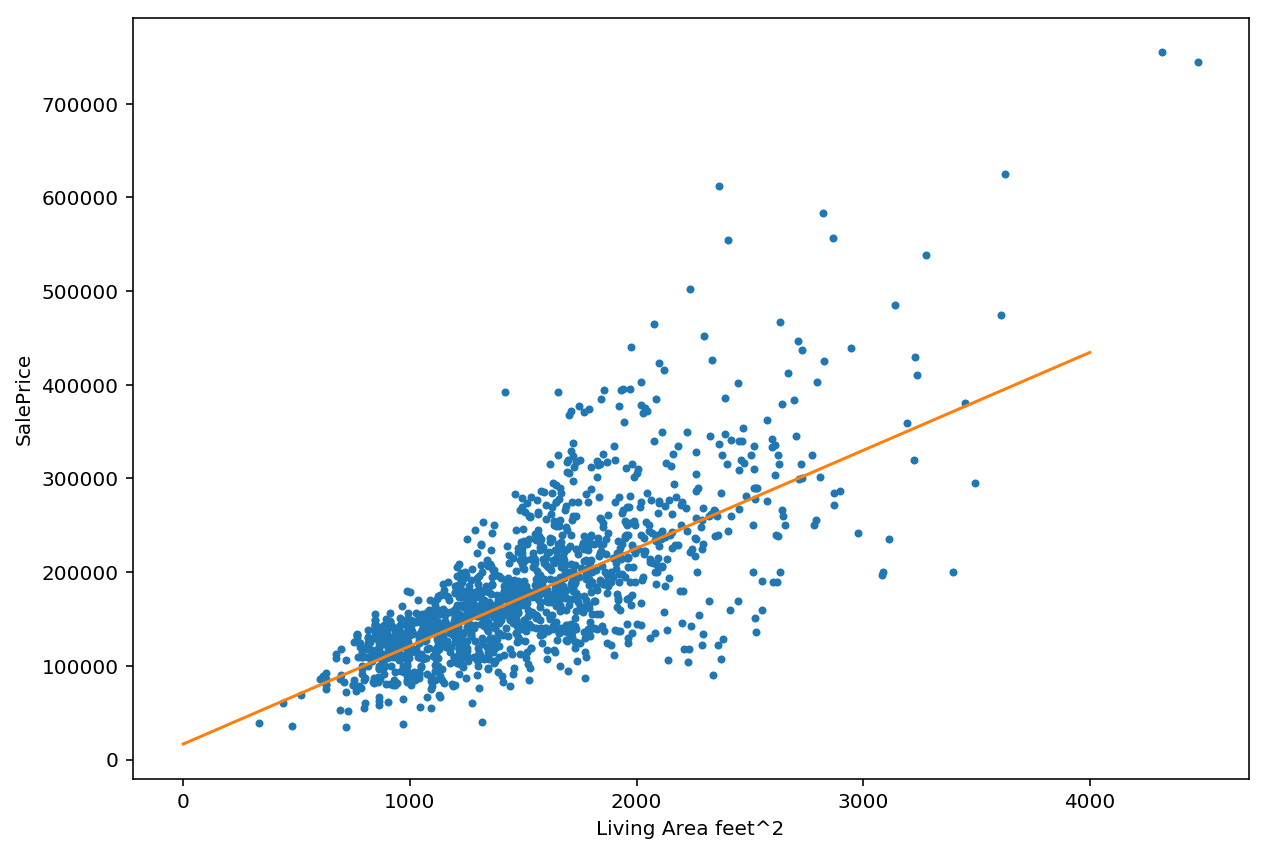

In [97]:
plt.figure(figsize=(10, 7))
plt.plot(new_X[:, 1], new_y, '.')
plt.plot(np.arange(0, 4000), model.predict(np.vstack((np.arange(0, 4000),np.arange(0, 4000))).T))
# plt.plot(np.arange(0, 4000), w[0] + w[1] * np.arange(0, 4000))
plt.xlabel('Living Area feet^2')
plt.ylabel('SalePrice');

In [103]:
selection = np.random.choice(np.arange(len(data)), 
                 size=int(len(data) * .9), replace=False)

In [108]:
test_selection = [i not in selection for i in np.arange(len(data))]

In [109]:
train = data.iloc[selection]

In [111]:
test = data.iloc[test_selection]

In [112]:
data.shape, train.shape, test.shape

((1460, 80), (1314, 80), (146, 80))

In [113]:
model = MyLinearRegression(2)

In [114]:
model.fit(train[['LotArea', 'GrLivArea']].values, train['SalePrice'].values)

In [116]:
predictions = model.predict(test[['LotArea', 'GrLivArea']].values)

In [119]:
np.sum((test['SalePrice'].values - predictions)**2) / len(test)

4011040566.2188087

In [121]:
np.sum((train['SalePrice'].values - model.predict(train[['LotArea', 'GrLivArea']].values))**2) / len(train)

3002757670.2175469